다차원 데이터를 탐색할 때 유용한 접근 방식은 데이터 세트의 서로 다른 하위 집합에 동일한 플롯의 여러 인스턴스를 그리는 것입니다. 이 기법은 "격자" 또는 "격자" 플로팅이라고도 하며 "작은 배수" 개념과 관련이 있습니다 . 이를 통해 뷰어는 복잡한 데이터 세트에 대한 많은 양의 정보를 빠르게 추출할 수 있습니다. Matplotlib는 여러 축으로 그림을 만드는 데 좋은 지원을 제공합니다. seaborn은 이를 기반으로 플롯의 구조를 데이터 세트의 구조에 직접 연결합니다.



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
sns.set_style("darkgrid")

# Conditional small multiples

이 FacetGrid클래스는 데이터 세트의 하위 집합 내에서 개별적으로 변수의 분포 또는 여러 변수 간의 관계를 시각화하려는 경우에 유용합니다. A는 FacetGrid최대 3개의 차원( row, col및 ) 으로 그릴 수 있습니다 hue. 처음 두 개는 결과 축 배열과 명백히 일치합니다. 색조 변수를 깊이 축을 따라 있는 세 번째 차원으로 생각하면 다양한 수준이 다른 색상으로 표시됩니다.

relplot(), , displot(), catplot(), 는 각각 lmplot()이 객체를 내부적으로 사용하고, 추가 조정에 사용할 수 있도록 완료되면 객체를 반환합니다.

FacetGrid이 클래스 는 그리드의 행, 열 또는 색조 차원을 형성할 변수의 이름과 데이터 프레임으로 개체를 초기화하여 사용됩니다 . 이러한 변수는 범주형 또는 불연속형이어야 하며 변수의 각 수준에 있는 데이터는 해당 축을 따라 패싯에 사용됩니다. 

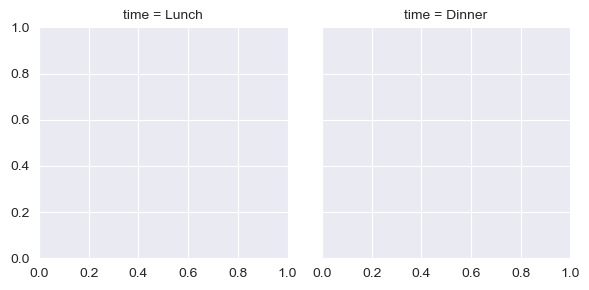

In [2]:
tips = sns.load_dataset("tips")
g = sns.FacetGrid(tips, col="time")

이와 같이 그리드를 초기화하면 matplotlib 그림과 축이 설정되지만 아무 것도 그리지 않습니다.


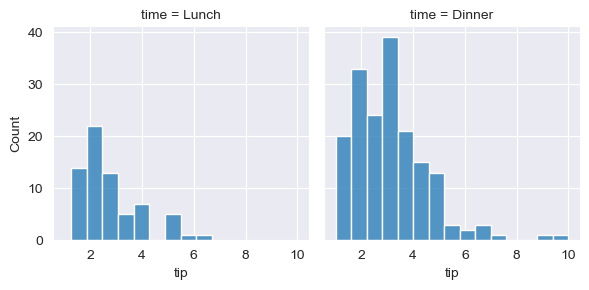

In [4]:
 #FacetGrid.map(). 플롯할 데이터 프레임의 변수 이름과 플로팅 함수를 제공합니다. 히스토그램을 사용하여 이러한 각 하위 집합의 팁 분포를 살펴보겠습니다.
g = sns.FacetGrid(tips, col="time")
g.map(sns.histplot, "tip");

- 이 기능은 그림을 그리고 축에 주석을 달고 한 단계로 완성된 플롯을 생성합니다. 
- 관계형 플롯을 만들려면 여러 변수 이름을 전달하기만 하면 됩니다. 플로팅 함수에 전달될 키워드 인수를 제공할 수도 있습니다.

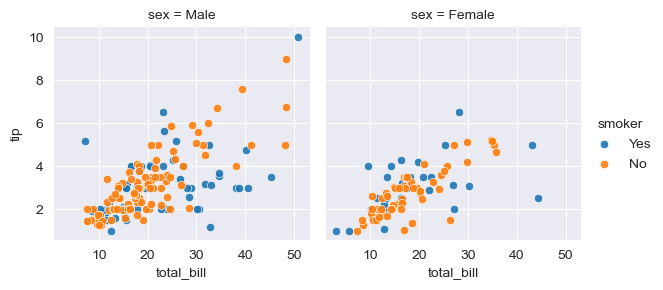

In [8]:
g = sns.FacetGrid(tips, col="sex", hue="smoker")
g.map(sns.scatterplot, "total_bill", "tip", alpha=.9)
g.add_legend();

클래스 생성자에 전달할 수 있는 격자 모양을 제어하기 위한 몇 가지 옵션이 있습니다.

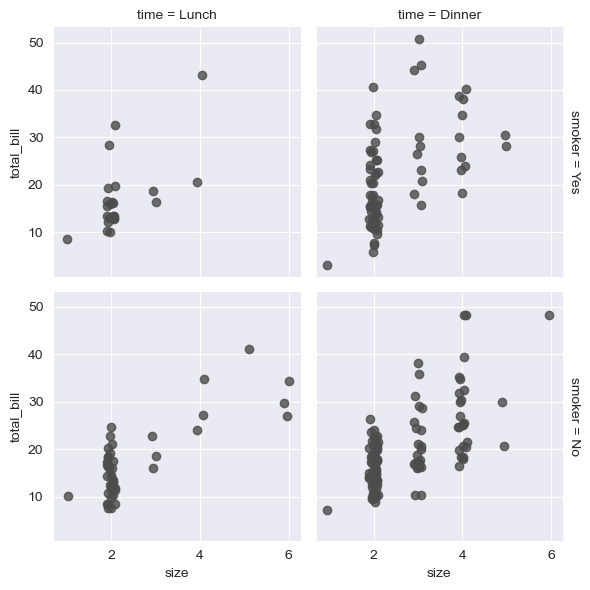

In [10]:
g = sns.FacetGrid(tips, row="smoker", col="time", margin_titles=True)
g.map(sns.regplot, "size", "total_bill", color=".3", fit_reg=False, x_jitter=.1);

margin_titlesmatplotlib API에서 공식적으로 지원하지 않으며 모든 경우에 제대로 작동하지 않을 수 있습니다 . 특히 현재 플롯 외부에 있는 범례와 함께 사용할 수 없습니다.


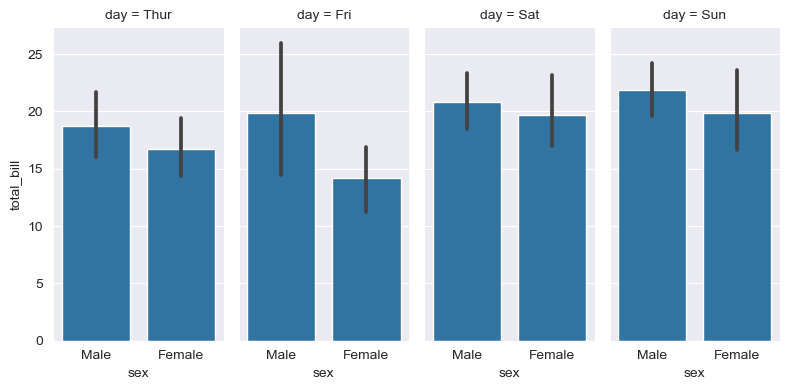

In [12]:
g = sns.FacetGrid(tips, col="day", height=4, aspect=.5)
g.map(sns.barplot, "sex", "total_bill", order=["Male", "Female"]);

패싯의 기본 순서는 DataFrame의 정보에서 파생됩니다. 패싯을 정의하는 데 사용되는 변수에 범주형이 있으면 범주 순서가 사용됩니다. 그렇지 않으면 패싯은 범주 수준의 출현 순서대로 됩니다. 그러나 적절한 *_order매개변수를 사용하여 패싯 치수의 순서를 지정할 수 있습니다.



In [15]:
ordered_days = tips.day.value_counts().index
ordered_days

CategoricalIndex(['Sat', 'Sun', 'Thur', 'Fri'], categories=['Thur', 'Fri', 'Sat', 'Sun'], ordered=False, dtype='category')

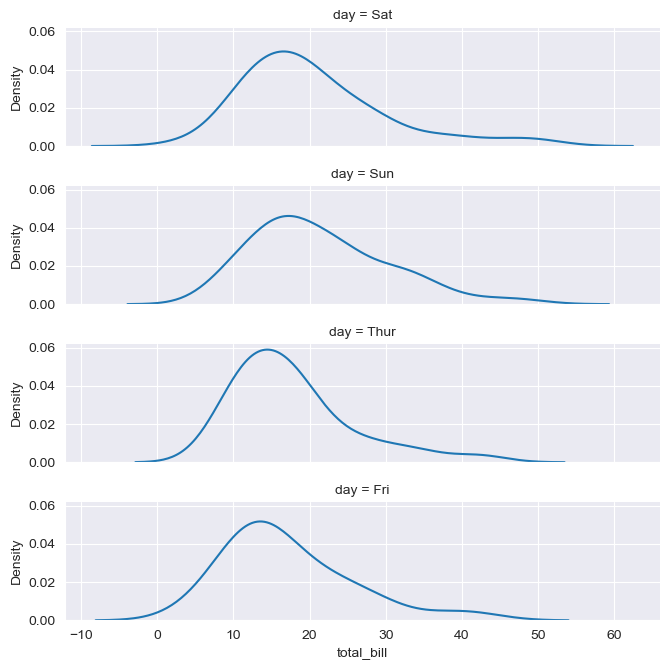

In [16]:
g = sns.FacetGrid(tips, row="day", row_order=ordered_days,
                  height=1.7, aspect=4,)
g.map(sns.kdeplot, "total_bill");

모든 색상 팔레트(즉, 에 전달할 수 있는 것 color_palette())를 제공할 수 있습니다. hue변수의 값 이름을 유효한 matplotlib 색상에 매핑하는 사전을 사용할 수도 있습니다 .

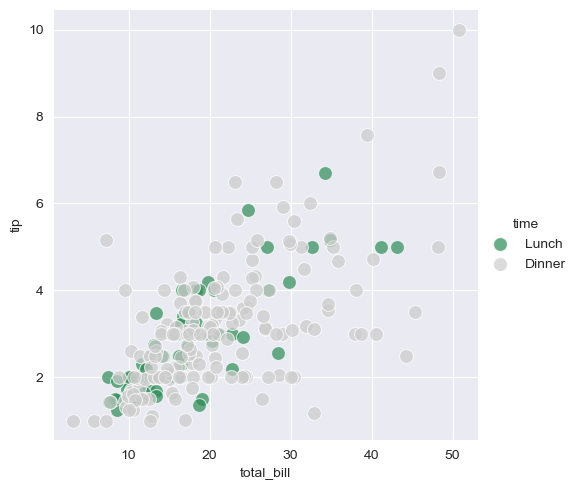

In [20]:
pal = dict(Lunch="seagreen", Dinner=".8")
g = sns.FacetGrid(tips, hue="time", palette=pal, height=5)
g.map(sns.scatterplot, "total_bill", "tip", s=100, alpha=.7)
g.add_legend()

한 변수의 수준이 여러 개인 경우 열을 따라 플롯할 수 있지만 여러 행에 걸쳐 있도록 "래핑"할 수 있습니다. 이때 row변수를 사용할 수 없습니다.

In [24]:
attend = sns.load_dataset("attention").query("subject <= 12")
attend

,Unnamed: 0,subject,attention,solutions,score
0,0,1,divided,1,2.0
1,1,2,divided,1,3.0
2,2,3,divided,1,3.0
3,3,4,divided,1,5.0
4,4,5,divided,1,4.0
5,5,6,divided,1,5.0
6,6,7,divided,1,5.0
7,7,8,divided,1,5.0
8,8,9,divided,1,2.0
9,9,10,divided,1,6.0


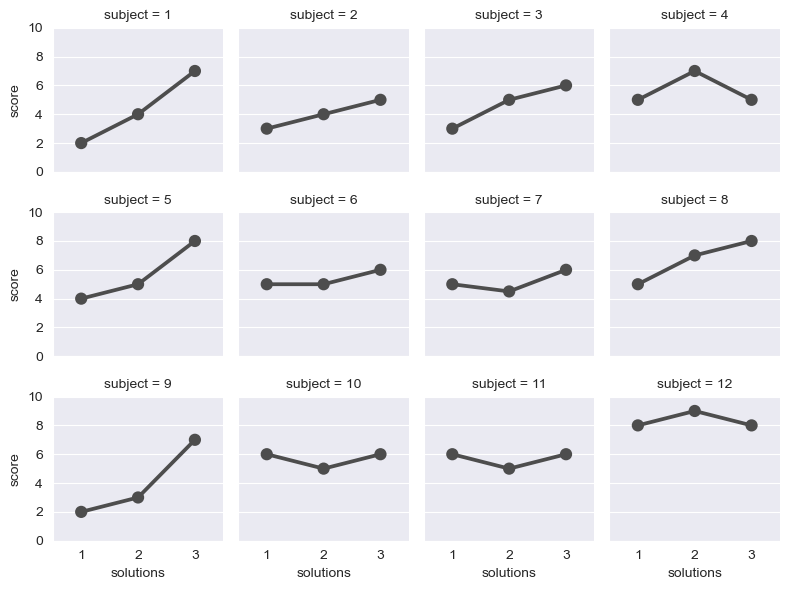

In [25]:
g = sns.FacetGrid(attend, col="subject", col_wrap=4, height=2, ylim=(0, 10))
g.map(sns.pointplot, "solutions", "score", order=[1, 2, 3], color=".3", errorbar=None);

사용하여 플롯을 그린 후에 FacetGrid.map()는 플롯의 일부 측면을 조정할 수 있습니다. FacetGrid또한 더 높은 수준의 추상화에서 그림을 조작하기 위한 개체 에 대한 여러 메서드가 있습니다 . 가장 일반적인 방법은 이고 내부 패싯에 축 레이블이 없다는 사실을 존중하는 와 FacetGrid.set()같은 더 전문적인 다른 방법이 있습니다 .

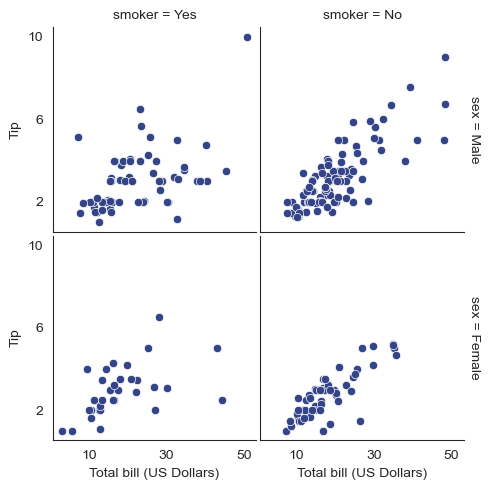

In [27]:
with sns.axes_style("white"):
    g = sns.FacetGrid(tips, row="sex", col="smoker", margin_titles=True, height=2.5)
g.map(sns.scatterplot, "total_bill", "tip", color="#334488")
g.set_axis_labels("Total bill (US Dollars)", "Tip")
g.set(xticks=[10, 30, 50], yticks=[2, 6, 10])#x축과 y축
g.figure.subplots_adjust(wspace=.02, hspace=.02)

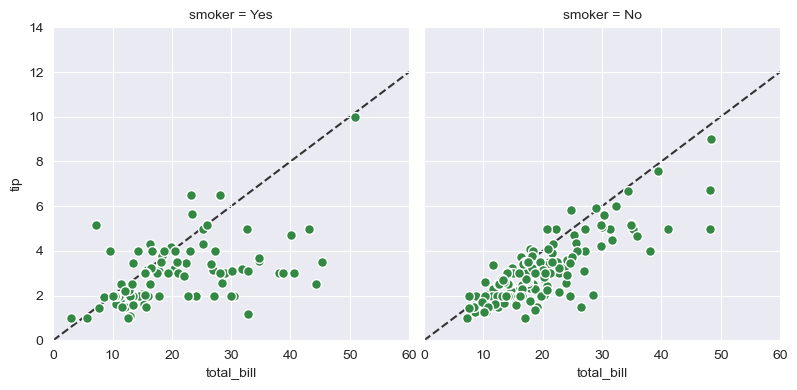

In [29]:
g = sns.FacetGrid(tips, col="smoker", margin_titles=True, height=4)
g.map(plt.scatter, "total_bill", "tip", color="#338844", edgecolor="white", s=50, lw=1)
for ax in g.axes_dict.values():
    ax.axline((0, 0), slope=.2, c=".2", ls="--", zorder=0)
g.set(xlim=(0, 60), ylim=(0, 14));